# Μια **πρακτική**  εισαγωγή στην Αστροστατιστική
---
δηλαδή εφαρμοσμένη στατιστική με ...*εφαρμογές* στην Αστρονομία

## Που μας χρειάζεται η στατιστικη 
(obvious)

### Βιβλιογραφία
1.Statistics, data mining, and machine learning in astronomy: a practical Python guide for the analysis of survey data. (Princeton University Press, 2014).

2.Wall, J. V. & Jenkins, C. R. Practical statistics for astronomers. (Cambridge University Press, 2003).

3.Chattopadhyay, A. K. & Chattopadhyay, T. Statistical Methods for Astronomical Data Analysis. 3, (Springer New York, 2014).

## Πιθανότητες και βασικές κατανομές
Παρακάτω θα εξετάσουμε κάποιες βασικές κατανομές, με μερικές πρακτικές εφαρμογές.
### Κατανομές στη Python μέσω της Scipy
Η `scipy` μας παρέχει όλες τις κατανομές μέσω του module `scipy.stats`.
Ετσι για παράδειγμα μπορούμε να δούμε διάφορες ιδιότητες/μεθόδους της κατανομής Poisson μέσω της instance `scipy.stats.poisson`.
Προσοχή, αυτό που θεωρούμε σαν κατανομή είναι στη πραγματικότητα αυτο που λέμε συνάρτηση πυκνότητας της κατανομής. Δηλαδή η συνάρτηση πυκνότητας της κατανομής Poisson μέσω της παραπάνω instance βρίσκεται από `scipy.stats.poisson.pmf()`.

Για λόγους συντομίας φορτώνουμε όλοκληρο το module `stats` ενώ ταυτόχρονα φορτώνουμε τις standard βιβλιοθήκες `numpy` και `matplotlib`

In [5]:
from scipy import stats
from scipy import integrate
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib import rc,rcParams
rc('text', usetex=True)
rcParams['figure.figsize'] = (9, 5.5)
rcParams['ytick.labelsize'],rcParams['xtick.labelsize'] = 17.,17.
rcParams['axes.labelsize']=19.
rcParams['legend.fontsize']=17.
rcParams['axes.titlesize']=20.
import seaborn as sb
sb.despine()
sb.set_style('white', {'xes.linewidth': 0.5, 'axes.edgecolor':'black'})
sb.despine(left=True)

<Figure size 648x396 with 0 Axes>

### Ομοιογενής (uniform) Κατανομή


### Διωνυμική (binomial) Κατανομή
H διωνυμική κατανομή μας δείχνει τον αριθμό των επιτυχιών $k$ ενός πειράματος με δύο δυνατά αποτελέσματα (Bernouli trials) δεδομένου της πιθανότητας $p$ επιτυχίας ενός πειράματος και του συνολικού αριθμού $n$ των πειραμάτων. 

Η πυκνότητα πιθανότητας δίνεται από την:
$$
Pr(k;n,p)=\binom{n}{k}p^k (1-p)^{n-k}
$$

Η πιθανότερη τιμή της κατανομής είναι:
$$
E[k]=np
$$
και η διακύμανση
$$
var[k]=np(1-p) =\sigma ^2
$$

#### Παράδειγμα 1
Ποιά είναι η κατανομή πιθανοτήτων των φορών που θα έχουμε γράμματα αν ρίξουμε ένα νόμισμα 10 φορές?

<BarContainer object of 10 artists>

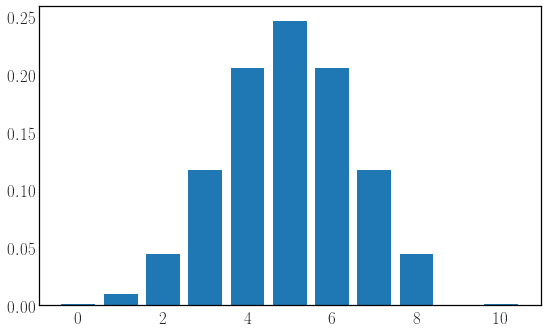

In [13]:
kk=np.linspace(0,10,10,dtype=int)
pr=stats.binom.pmf(kk,p=0.5,n=10)
plt.bar(kk,pr)

#### Παράδειγμα 2
Υποθέστε ότι γνωρίζουμε από ένα δείγμα 100 γαλαξιακών σμηνών ότι σε 10 από αυτά περιέχεται ένας κυρίαρχος κεντρικός γαλαξίας. Σκοπέυουμε να ελέγξουμε ένα δεύτερο διαφορετικό δείγμα από 30 σμήνη, τα οποία έχουνε επιλεχθεί για παράδειγμα από έναν κατάλογο ακτίνων Χ. 

* Σε πόσους από αυτους περιμένουμε να υπάρχει το αντίστοιχο φαινόμενο. 

* Ποια η πιθανότητα να παρατήρησουμε παραπάνω από 8? 

---

Υποθέτουμε ότι $p=0.1$ άρα 
$$
Pr(k)=\binom{30}{k}0.1^k 0.9^{30-k}
$$
(Η κατανομή φαίνεται από το διαγραμμα παρακάτω.)

* Η πιθανότερη τιμή είναι $\mu= 3$ με τυπική απόκλιση $\sigma = 1.6$

* Η πιθανότητα να δούμε περισσότερους από 8 είναι:
$$
Pr(k>8)=\sum _{i=8}^{30} Pr(i) = 0.02
$$

Τι θα προτείνατε σε περίπτωση που παρατήρησουμε πχ 10 γαλαξίες?

Pr(k>8)=0.002
Pr(k=10)=0.00037


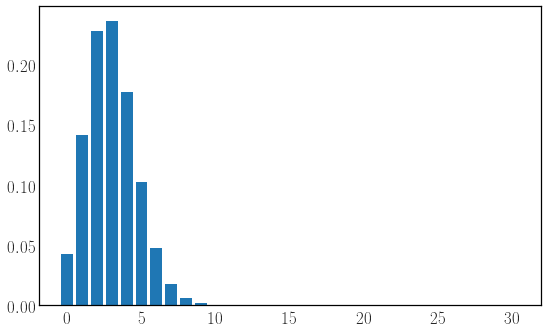

In [14]:
kk=np.linspace(0,30,30,dtype=int)
pr=stats.binom.pmf(kk,p=0.1,n=30)
plt.bar(kk,pr)
print('Pr(k>8)={:.3f}'.format(pr[kk>8].sum()))
print('Pr(k=10)={:.5f}'.format(pr[10]))

### Κατανομή Poisson
Η κατανομή Poisson είναι μια διακριτή κατανομή του αριθμού γεγονότων σε ένα συγκεκριμένο χρονικό διάστημα δεδομένου του μέσου αριθμού γεγονότων $\mu$ για αυτό το διάστημα. Η συνάρτηση πυκνότητας πιθανότητας είναι:
$$
Pr(x;\mu)=\frac{\mu ^x e^{-\mu}}{x!}
$$

Η πιθανότερη τιμή της κατανομής καί η διακύμανση είναι:
\begin{align}
E[x]=\mu && var[x]=\sigma ^2=\mu
\end{align}

#### Παράδειγμα
Σε έναν αγώνα ποδοσφαίρου μπαίνουν κατα μέσο όρο $2.5$ γκόλ. Ποιά είναι η πιθανότητα να μπούν $x$ γκόλ?

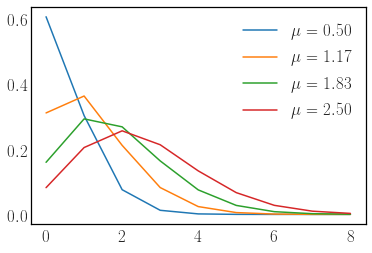

In [36]:
xx=np.linspace(0,8,9,dtype=int)
#pr=stats.poisson.pmf(xx,mu=2.5)
#plt.bar(xx,pr)
for mu in np.linspace(0.5,2.5,4):
    pr=stats.poisson(mu).pmf(xx)
    plt.plot(xx,pr,label='$\mu = {:.2f}$'.format(mu))
plt.legend()

#### Παράδειγμα
Ο αριθμός των φωτονίων που φτάνει σε συγκεκριμένο χρονικό διάστημα σε έναν ανιχνευτή είναι σε πολύ καλή προσέγγιση (υποθέτωντας οτι η πιθανότητα εκπομπής διαδοχικών φωτονίων είναι ανεξάρτητη) είναι μια διαδικασία Poisson.

Αν υποθέσουμε $t$ το χρόνο ολοκλήρωσης του ανιχνευτή, και το ρυθμό εκπομπής φωτονίων $\lambda$ τότε η μέση τιμή των φωτονίων -και το σφάλμα- που μετράει ο ανιχνευτής είναι
\begin{align}
\mu = \lambda t && // && \sigma = \sqrt{\mu} = \sqrt{\lambda t}
\end{align}
άρα το σήμα που πέρνουμε (οι μέσες τιμες) σε σχέση με το θόρυβο θα είναι
$$
S/N \propto \sqrt{t}
$$
> Ο παραπάνω υπολογισμός δεν παίρνει υπόψιν του το θόρυβο του ανιχνευτή (readout noise). Το σφάλμα οφείλεται εξ ολοκλήρου στα φωτόνια. 

### Κανονική Κατανομή (Gaussian)
Η διωνυμική (για μεγάλο $N$) και η κατανομή poisson (για μεγάλο $\mu$) τείνουν στη κανονική κατανομή (ή κατανομή Gauss). Η Gauss σε σχέση με τις προηγούμενες που είδαμε είναι μια συνεχής κατανομή με δύο ανεξάρτητες παραμέτρους, τη μέση τιμή $\mu$ και τη τυπική απόκλιση $\sigma$ και έχει συνάρτηση πυκνότητας πιθανότητας:

$$
Pr(x;\mu,\sigma)=\frac{1}{\sigma \sqrt{2}}\exp \Big( -\frac{(x-\mu)^2}{2\sigma^2} \Big)
$$

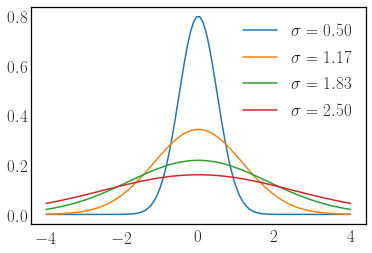

In [31]:
xx=np.linspace(-4,4,100)
for s in np.linspace(0.5,2.5,4):
    pr=stats.norm(0,s).pdf(xx)
    plt.plot(xx,pr,label='$\sigma = {:.2f}$'.format(s))
plt.legend()

Η Gauss είναι από ίσως η πιο σημαντική κατανομή καθώς σύμφωνα με το **Κεντρικό Οριακό Θεώρημα** οι μέσες τιμές πολλών τύχαιων μεταβλητών -ανεξαρτήτως των κατανομών που τις παρήγαγαν- κατανέμονται σαν τέτοια!

Αυτό σημαίνει οτι περιμένουμε η πλειονότητα των μετρήσεων μας να κατανέμονται σαν κανονικές κατανομές.

### Η κατανομή $x^2$
Αν τραβήξουμε ένα πλήθος $\{x_i\} ^N$ απο μια κανονική κατανομή $N(\mu,\sigma)$ τότε ορίζουμε τη ποσότητα
$$
Q = \sum _{i=1} ^N \frac{x_i-\mu}{\sigma}
$$

H Q αποδυκνύεται οτι ακολουθεί τη λεγόμενη κατανομή $x^2$ η οποία έχει σαν μοναδική παράμετρο τους βαθμούς ελευθερίας $N$.
$$
Pr(Q;N)=\frac{Q^{\frac{N}{2}-1}}{2^{N/2} \Gamma (N/2) } \exp \Big( \frac{-Q}{2} \Big)
$$

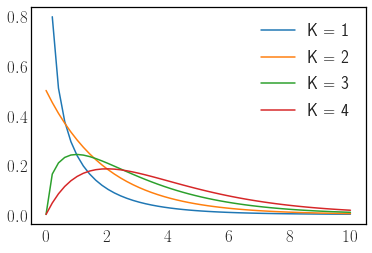

In [23]:
xx=np.linspace(0,10)
for K in range(1,5):
    pr=stats.chi2(K).pdf(xx)
    plt.plot(xx,pr,label='K = {}'.format(K))
plt.legend()

### Η κατανομή t (Student's t)
Ομοίως με πριν αν τραβήξουμε  ένα πλήθος $\{x_i\} ^N$ απο μια κανονική κατανομή $N(\mu,\sigma)$ η ποσότητα
$$
t =  \frac{\bar{x}-\mu}{s/\sqrt{N}}
$$
όπου
\begin{align}
\bar{x} =\frac{1}{N}\sum _{i=1} ^N x_i && \text{και} && s=\sqrt{\frac{1}{N-1}\sum _{i=1} ^N (x_i-\bar{x})^2}
\end{align}
δηλαδή η μέση τιμή και η τυπική απόκλιση όπως τη λαμβάνουμε από τα δεδομένα.

Η κατανομή της $t$ εξαρτάται πάλι μόνο από τους βαθμούς ελευθερίας $N$:
$$
Pr(t;N)= \frac{\Gamma (\frac{N+1}{2})}{\sqrt{\pi N}\Gamma (\frac{N}{2})} \Big( 1+\frac{t^2}{N} \Big)^{-\frac{N+1}{2}}
$$

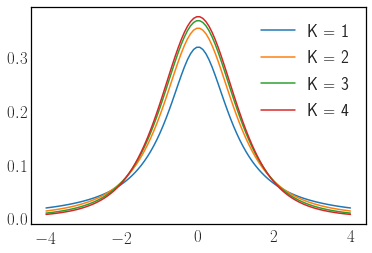

In [39]:
xx=np.linspace(-4,4,100)
for K in range(1,5):
    pr=stats.t(K).pdf(xx)
    plt.plot(xx,pr,label='K = {}'.format(K))
plt.legend()

#### Παράδειγμα 3
Στο facebook γκρουπ του Μαθηματικού έγινε μια ψηφοφορία για τη κατανομή των ζωδίων των μελών του γκρουπ. Με βάση τα δεδομένα (που δίνονται παρακάτω) μπορούμε να βγάλουμε συμπεράσματα για την κατανομή γεννήσεων μέσα στο έτος?

<BarContainer object of 12 artists>

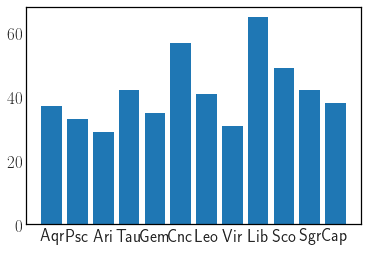

In [40]:
data=np.array([37,33,29,42,35,57,41,31,65,49,42,38])
names=['Aqr','Psc','Ari','Tau','Gem','Cnc',
      'Leo','Vir','Lib','Sco','Sgr','Cap']
plt.bar(names,data,label='Data')

Κάνουμε την υπόθεση (null hypothesis) οτί η κατανομή των γεννήσεων είναι ισοπίθανη μέσα στο έτος. Άρα θα περιμένουμε ότι ο αριθμός ανθρώπων ανα ζώδιο προέρχεται από ομοιογενή κατανομή.

Η πιθανότητα να παρατηρήσουμε έναν συγκεκριμένο αριθμό ατόμων δίνεται από μια διωνυμική κατανομή με πιθανότητα $p=1/12$. Ο αριθμος των ατομων ειναι $n=499$.
Άρα η τυπική τιμή είναι $np=41.6$ με τυπική απόκλιση $\sigma = 6.2$

E[X] = 41.58 / var[X] = 38.12 (sigma = 6.17)


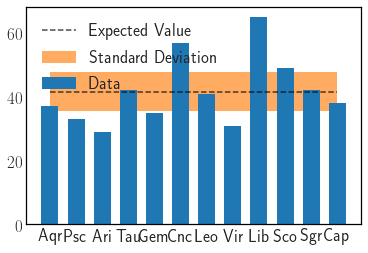

In [41]:
N=data.sum()
p=1/12
mu=N*p
var=((p)*(1-p))*N
sd=np.sqrt(var)
print('E[X] = {:.2f} / var[X] = {:.2f} (sigma = {:.2f})'.format(mu,var,sd))

plt.bar(names,data,width=0.65,label='Data')
plt.hlines(mu,0,11,linestyles='--',label='Expected Value',alpha=0.7)
plt.fill_between(range(12),(mu-sd)*np.ones(12),(mu+sd)*np.ones(12),alpha=0.65,label='Standard Deviation')
plt.legend(loc=2)

Γεια να εξέτασουμε αν ισχύει η υπόθεση θα χρησιμοποιήσουμε το λεγόμενο $x^2$ test του Pearson. 
Τα δεδομένα μας αποτελούνται από $K=12$ διακριτές τιμές $D_i$. Θεωρώντας τα "υποτιθέμενα" δεδομένα $D_{h_i}$ τα οποία στη περίπτωση μας για ομοιογενή κατανομή είναι η τυπική τιμή $np$

Όριζουμε τη μετρική $x^2$ -για την οποία θα μιλήσουμε κι αργότερα-:
$$
x^2=\sum_{i=1} ^{K} \frac{(D_i-D_{h_i})^2}{D_{h_i}} = \sum_{i=1} ^{12} \frac{(D_i-np)^2}{np} = 30.37
$$

Στη συνέχεια συγκρίνουμε τη τιμή που μετρήσαμε με τη θεωρητική κατανομή της $x^2$ για $K-1$ βαθμούς ελευθερίας (1 βαθμός ελευθερίας λιγότερος λόγω του μοντέλου που επιλέξαμε).  

Η κατανομή της $x^2$ (θα την ονομάσουμε $\text{chi2}(x)$) αντιπροσωπέυει τη πιθανότητα οι διακυμάνσεις των παρατηρήσεων από τα υποτιθέμενα δεδομένα να είναι τυχαίες. Ο υπολογισμός της πιθανότητας λοιπόν οι παραπάων παρατηρήσεις να είναι τυχαίες δίνονται από τη σχέση:
$$
P=\int _{x^2} ^{\infty} \text{chi2}(x) dx = 0.0014
$$

Άρα η πιθανότητα η κατανομή των γεννήσεων ανα μήνα να είναι ομοιογενής στο έτος σύμφωνα με τα παραπάνω δεδομένα είναι 0.14%. Επιλέγοντας μια κρίσιμη τιμή που συνήθως είναι το 5% βγάζουμε το συμπερασμα ότι η υπόθεση μας **απορρίπτεται**.


x^2 = 30.37 / x^2 (reduced) = 2.76
P value = 0.0014
Null Hypothesis is Rejected


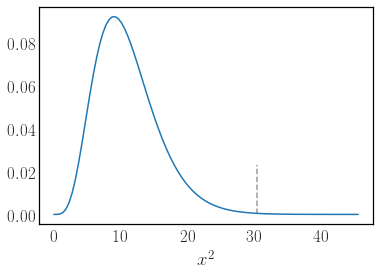

In [42]:
x2=np.sum((N*p-data)**2/(N*p))
print('x^2 = {:.2f} / x^2 (reduced) = {:.2f}'.format(x2,x2/11))

def chi2d(x): return stats.chi2.pdf(x,11)

xx=np.linspace(0,1.5*x2,100)
plt.plot(xx,chi2d(xx))
plt.vlines(x2,0,chi2d(xx).max()/4,linestyles='--',alpha=0.4)
plt.fill_between(xx[xx>x2],0,chi2d(xx)[xx>x2],alpha=0.25)
plt.xlabel('$x^2$')

P=integrate.quad(chi2d,x2,100)[0]
Pc=0.05
print('P value = {:.4f}'.format(P))
NH = 'Accepted' if P>Pc else 'Rejected'
print('Null Hypothesis is {}'.format(NH))

### Παράδειγμα 
Εστω οτι παρατηρούμε εναν αστέρα στον ουρανό και μετράμε τη ροή φωτονίων. Θεωρώντας ότι η ροή είναι σταθερή με το χρόνο ίση με $F_{\mathtt{true}}$.  

Παίρνουμε $N$ παρατηρήσεις, μετρώντας τη ροή $F_i$ και το σφάλμα $e_i$. 

Η ανίχνευση ενός φωτονίου είναι ενα ανεξάρτητο γεγονός που ακολουθεί μια τυχαία κατανομή Poisson. Από τη διακύμανση της κατανομής Poisson υπολογίζουμε το σφάλμα $e_i=\sqrt{F_i}$

Mean = 997.10 (diff -2.90) // std = 30.20


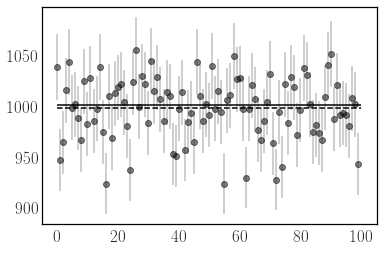

In [49]:
N=100
F_true=1000.
F=np.random.poisson(F_true*np.ones(N))
e=np.sqrt(F)

plt.errorbar(np.arange(N),F,yerr=e, fmt='ok', ecolor='gray', alpha=0.5)
plt.hlines(np.mean(F),0,N,linestyles='--')
plt.hlines(F_true,0,N)
print('Mean = {:.2f} (diff {:.2f}) // std = {:.2f}'.format(np.mean(F),np.mean(F)-F_true,np.std(F)))

/usr/local/lib/python3.5/dist-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


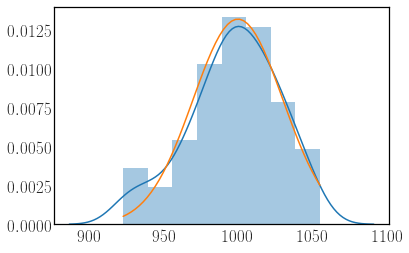

In [52]:
ax=sb.distplot(F)
xx=np.linspace(F.min(),F.max())
gaus=np.exp(-0.5*((xx-F_true)/np.std(F))**2)/np.sqrt(2.*np.pi*np.std(F)**2)
ax.plot(xx,gaus)

Η αρχική προσέγγιση μας είναι μέσω της μεγιστοποιήσης της πιθανοφάνειας. Με βάση τα δεδομένωα $D_i=(F_i,e_i)$ μπορούμε να υπολογίσουμε τη πιθανότητα να τα έχουμε παρατηρήσει δεδομένου της αληθινής τιμής $F_{\mathtt{true}}$ υποθέτωντας ότι τα σφάλματα είναι gaussian
$$
P(D_i|F_{\mathtt{true}})=\frac{1}{\sqrt{2\pi e_i^2}} \exp \Big( -\frac{(F_i-F_{\mathtt{true}})^2}{2e_i^2} \Big)
$$

Ορίζουμε τη συνάρτηση πιθανοφάνειας σαν το σύνολο των πιθανοτήτων για κάθε σημείο
$$
L(D|F_{\mathtt{true}})=\prod _{i=1}^N P(D_i|F_{\mathtt{true}})
$$

Επειδή η τιμή της συνάρτηση πιθανοφάνειας μπορεί να γίνει πολύ μικρή, είναι πιο έυκολο να χρησιμοποιήσουμε το λογάριθμο της
$$
\log L = -\frac{1}{2} \sum _{i=0}^N \big[ \log(2\pi e_i^2) + \frac{(F_i-F_\mathtt{true})^2}{e_i^2} \big]
$$

## Τυχαίες μεταβλητές 
Μια τυχαία (ή στοχαστική) μεταβλητή είναι μια μεταβλήτη η οποία προέρχεται από μια ποσότητα που υπόκεινται σε τυχαίες διακυμάνσης. Προέρχεται δηλαδή από μια στατιστική κατανομή. Υπαρχουν δύο ειδών τυχαίες μεταβλήτες, οι διακριτές (που μπορεί να προέρχονται για παράδειγμα από μια διωνυμική ή poisson κατανομή) και οι συνεχείς (gaussian αντιστοιχα)

Δύο τυχαίες μεταβλητές $x,y$ είναι ανεξάρτητες να και μόνο αν:
$$p(x,y)=p(x)p(y)$$
Στη περίπτωση όπου δύο τυχαίες μεταβλητές δεν είναι ανεξάρτητες τότε:
$$ p(x,y)=p(x|y)p(y)=p(y|x)p(x) $$
Η marginal πιθανότητα δίνεται από 
$$
p(x)= \int p(x,y)dy = \int p(x|y)p(y) dy
$$
Στο παρακάτω σχήμα γίνεται εμφανές η πραγματική κατανομή δυο μή ανεξαρτήτων μεταβλητών. Από τη συνδυασμένη κατανομή παίρνουμε slices τα οποία φαίνονται στα δεξιά. 

Δεν αρκεί όμως απλά να πάρουμε το slice της κατανομής. Η $p(x|1.5)$ είναι και αυτή μια κατανομή, άρα θα πρέπει συνολικά να έχει πιθανότητα 1. Άρα πρέπει να κανονικοποιήσουμε τη κατανομή, δηλαδή να διαιρέσουμε με τη marginal κατανομή της $y$ στο συγκεκριμένο slice, $$p(x|1.5)=\frac{p(x,y=1.5)}{p(y=1.5)}$$

![joint_probabillity](figures/joint_probability.png)

Ο κανόνας του Bayes χτίζεται γενικεύοντας τις παραπαπάνω σχέσεις:
$$
p(y|x)=\frac{p(x|y)p(y)}{p(x)}=\frac{p(x|y)p(y)}{\int p(x|y)p(y)dy}
$$

Ο απλός αυτός κανόνας, μια απλη αγλεβρική αναδιάταξη δηλαδή, μας ανοίξε νέους ορίζοντες στο να κάνουμε στατιστική. Ας δούμε ένα απλό παράδειγμα. 

Έστω ότι παρατηρούμε κάποιον -τον φώτη- να φοράει κασκόλ της αεκ, ποια η πιθανότητα να είναι οπαδός της αεκ?
Τα ενδεχόμενα είναι δύο
* ενδεχόμενο Α ο φώτης είναι αεκ
* ενδεχόμενο Α' ο φώτης δεν είναι αεκ

Αναζητούμε τη πιθανότητα δεδομένου ο φώτης να φοράει κασκολ της αεκ, να είναι και αεκ. Δηλαδή τη πιθανότητα $P(\text{αεκ}|\text{κασκολ αεκ})$.

Χρησιμοποιώντας το κανόνα του Bayes έχουμε:

$$
P(\text{αεκ}|\text{κασκολ αεκ})=
\frac{P(\text{αεκ}) P(\text{κασκολ αεκ}|\text{αεκ})}{P(\text{αεκ}) P(\text{κασκολ αεκ}|\text{αεκ})+
P(\text{οχι αεκ}) P(\text{κασκολ αεκ}|\text{οχι αεκ})}
$$


Ας μελετήσουμε τη σχέση αυτή βήμα - βήμα:

Ο όρος $P(\text{αεκ})$ αποτελεί τη πιθανότητα να είναι κάποιος ΑΕΚ γενικά. Αυτη η πιθανότητα ονομάζεται **prior** και είναι η καινοτομία (καλή ή και κακή) που μας φέρνει η bayesian προσέγγιση. Θα πρέπει λοιπόν να έχουμε μια ένδειξη της υπόθεσης μας. Θεωρώντας ότι η ΑΕΚ είναι μια γνωστή ομάδα, οπού κρατάει ένα ποσοστό κοντά αλλα χαμηλότερα στο $1/3$ στην αθήνα θεωρούμε μια τιμή $1/5$. 

Ο όρος $P(\text{κασκολ ΑΕΚ}|\text{ΑΕΚ})$ αποτελεί τη πιθανότητα του να μην είναι τύχαιο κάποιος να φοράει ένα κασκολ της ΑΕΚ. Πρόκειται για τη σχέση πιθανοφάνειας ή **likehood**. Θεωρώντας ότι είναι αρκετά σπάνιο φαινόμενο αυτό δίνουμε μια τιμή $0.9$. Σημειώστε ότι χωρίς τη χρήση της bayesian προσέγγισης μάλλον η εκτίμηση μας θα ήταν αντίστοιχη αυτού του αριθμού.

Ο όρος στον παρονομάστη είναι ουσιάστικα ένας όρος κανονικοποιήσης. Στα δικά μας δεδομένα είναι έυκολο να υπολογιστεί καθώς έχουμε μόνο δύο ενδεχώμενα. Σε πραγματικά δεδομένα -όπου θέλουμε σαν αποτέλεσμα μια κατανομή- όμως είναι πολύπλοκο να υπολογιστεί. Αυτό δεν μας πειράζει όμως καθώς μπορούμε έυκολα να κάνουμε τη κανονικοποίηση χωρίς να τον υπολογίσουμε.

\begin{align}
P(\text{αεκ}) = P_0 = 0.2 \\
P(\text{όχι αεκ}) = 1-P_0 = 0.8 \\
P(\text{κασκολ αεκ}|\text{αεκ}) = 0.9 \\
P(\text{κασκολ αεκ}|\text{οχι αεκ}) = 0.1 \\
\end{align}

Η τελική πιθανότητα, ονομάζεται **posterior** υπολογίζεται λοιπόν περίπου $70\%$.

In [4]:
0.2*0.9/(0.2*0.9+0.8*0.1)

0.6923076923076924

In [12]:
sample=stats.norm.rvs(np.ones(100)*10)

In [16]:
sample.mean()

9.913643453206271